In [1]:
#########Practica 3 Extraccion de caracteristicas ##############
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
#######PCA###
file = "/Users/hillaryram/Downloads/19000-spotify-songs/song_data2.csv"

all_variables = ['song_name','song_popularity','song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness','audio_mode','speechiness','tempo','time_signature','audio_valence'] #ojo en el tarjet
features = ['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness','audio_mode','speechiness','tempo','time_signature','audio_valence']
target = ['popularity']

df = pd.read_csv(file)
df.head()



,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
lista=[]
for i in range(0,len(df)):
    if df['song_popularity'][i]<25:
        lista.append('unknown')
    elif df['song_popularity'][i]<50:
        lista.append('underated')
    elif df['song_popularity'][i]<75:
        lista.append('fine')
    else:
        lista.append('hit')
df['popularity']=lista
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,fine
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,fine
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,hit
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,fine
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,fine


In [4]:
#Para aplicar PCA se tiene que escalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

/Users/hillaryram/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.140059,0.005541,0.502533,0.682342,0.000029,0.727273,0.049226,0.859242,1.0,0.031243,0.689425,0.8,0.481707
1,0.114658,0.010340,0.549139,0.853697,0.000000,0.272727,0.099580,0.801948,0.0,0.052922,0.434371,0.8,0.376016
2,0.122938,0.008202,0.746707,0.462888,0.448345,0.000000,0.250333,0.766734,1.0,0.084166,0.511233,0.8,0.329268
3,0.114658,0.026505,0.456940,0.970940,0.003561,0.000000,0.093426,0.838352,1.0,0.113709,0.505303,0.8,0.201220
4,0.118514,0.000957,0.452888,0.766517,0.000000,0.909091,0.104707,0.835204,1.0,0.033262,0.709856,0.8,0.583333


In [5]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,44121.412708,45.768959,-2.757608,2.427004,-0.450289,0.005318,-0.111054,0.075370,-0.049887,-0.076126,-0.151499,-0.126173,0.068971
1,-1278.587671,-15.789080,-1.105092,-2.392551,0.665569,-0.031682,-0.041421,0.246904,-0.129675,0.100254,-0.170328,0.047223,-0.075981
2,13521.412442,2.715301,0.985770,-5.221401,-0.227924,-0.054617,-0.115324,0.363189,0.189328,-0.205074,0.179894,-0.161962,0.058528
3,-1278.587563,1.421287,-1.947694,-5.523784,-0.269026,0.020076,-0.221451,0.315759,-0.106448,0.121867,-0.175459,0.168748,-0.072974
4,5614.412737,50.940006,-1.950991,4.506521,-0.478538,-0.052880,0.008343,0.105899,-0.042779,0.050912,-0.163723,-0.090133,0.043499


In [6]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99999762e-01, 2.29927637e-07, 4.03589469e-09, 3.64064028e-09,
       6.30951739e-11, 2.57601288e-11, 1.72206527e-11, 1.64356443e-11,
       1.10934495e-11, 6.89675169e-12, 5.26853011e-12, 2.92840557e-12,
       2.35903699e-12])

In [7]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,44121.412708,45.768959,-2.757608,2.427004,-0.450289,0.005318,-0.111054,0.075370,-0.049887,-0.076126,-0.151499,-0.126173,0.068971,fine
1,-1278.587671,-15.789080,-1.105092,-2.392551,0.665569,-0.031682,-0.041421,0.246904,-0.129675,0.100254,-0.170328,0.047223,-0.075981,fine
2,13521.412442,2.715301,0.985770,-5.221401,-0.227924,-0.054617,-0.115324,0.363189,0.189328,-0.205074,0.179894,-0.161962,0.058528,hit
3,-1278.587563,1.421287,-1.947694,-5.523784,-0.269026,0.020076,-0.221451,0.315759,-0.106448,0.121867,-0.175459,0.168748,-0.072974,fine
4,5614.412737,50.940006,-1.950991,4.506521,-0.478538,-0.052880,0.008343,0.105899,-0.042779,0.050912,-0.163723,-0.090133,0.043499,fine


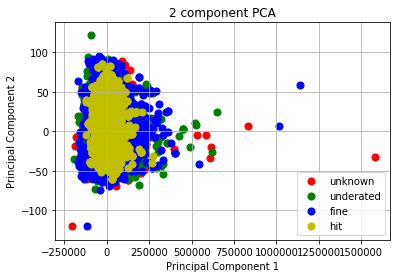

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['unknown','underated','fine', 'hit']
colors = ['r', 'g', 'b','y']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()